# PART I - different stuff

# Loading the data

data is from https://www.federalreserve.gov/econres/feds/the-us-treasury-yield-curve-1961-to-the-present.htm

## Loading full dataset

In [1]:
from __future__ import print_function, division   # Ensures Python3 printing & division standard
import pandas as pd 
from pandas import Series, DataFrame 
from matplotlib import pyplot as plt
import numpy as np

SavePlots = False

In [2]:
import pandas as pd

# Skip the first 9 rows
data = pd.read_csv('../Final-Project-AppML/feds200628.csv', skiprows=9)

# Show the first 5 rows of the resulting dataframe
data.head(5)


Date     BETA0     BETA1     BETA2  BETA3  SVEN1F01  SVEN1F04  \
0  1961-06-14  3.917606 -1.277955 -1.949397    0.0    3.8067    3.9562   
1  1961-06-15  3.978498 -1.257404 -2.247617    0.0    3.8694    4.0183   
2  1961-06-16  3.984350 -1.429538 -1.885024    0.0    3.8634    4.0242   
3  1961-06-19  4.004379 -0.723311 -3.310743    0.0    3.9196    4.0447   
4  1961-06-20  3.985789 -0.900432 -2.844809    0.0    3.8732    4.0257   

   SVEN1F09  SVENF01  SVENF02  ...  SVENY23  SVENY24  SVENY25  SVENY26  \
0       NaN   3.5492   3.8825  ...      NaN      NaN      NaN      NaN   
1       NaN   3.5997   3.9460  ...      NaN      NaN      NaN      NaN   
2       NaN   3.5957   3.9448  ...      NaN      NaN      NaN      NaN   
3       NaN   3.6447   3.9842  ...      NaN      NaN      NaN      NaN   
4       NaN   3.5845   3.9552  ...      NaN      NaN      NaN      NaN   

   SVENY27  SVENY28  SVENY29  SVENY30      TAU1    TAU2  
0      NaN      NaN      NaN      NaN  0.339218 -999.99  
1      NaN      NaN      NaN      NaN  0.325775 -999.99  
2      NaN      NaN      NaN      NaN  0.348817 -999.99  
3      NaN      NaN      NaN      NaN  0.282087 -999.99  
4      NaN      NaN      NaN      NaN  0.310316 -999.99  

[5 rows x 100 columns]

## Removing non-essential rows and columns

In [3]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter rows where Date is on or after 1985-01-02
data1 = data[data['Date'] >= '1985-01-02']

# Optional: check the result
data1.head()


Date      BETA0     BETA1       BETA2       BETA3  SVEN1F01  \
6145 1985-01-02  11.833172 -4.078431 -617.564405  620.832652   11.1608   
6146 1985-01-03  11.967238 -4.169920 -617.777654  620.619446   11.1536   
6147 1985-01-04  12.049434 -4.354115 -617.725058  620.671900   11.2057   
6148 1985-01-07  11.960591 -4.299825 -617.803915  620.593354   11.1201   
6149 1985-01-08  11.861243 -4.192519 -617.794508  620.602735   11.0820   

      SVEN1F04  SVEN1F09  SVENF01  SVENF02  ...  SVENY23  SVENY24  SVENY25  \
6145   12.5602   12.3404  10.1920  11.3976  ...      NaN      NaN      NaN   
6146   12.4338   12.3620  10.2197  11.3545  ...      NaN      NaN      NaN   
6147   12.4703   12.4150  10.2513  11.4123  ...      NaN      NaN      NaN   
6148   12.2761   12.2690  10.1968  11.3032  ...      NaN      NaN      NaN   
6149   12.2177   12.1834  10.1686  11.2611  ...      NaN      NaN      NaN   

      SVENY26  SVENY27  SVENY28  SVENY29  SVENY30      TAU1      TAU2  
6145      NaN      NaN      NaN      NaN      NaN  2.183248  2.183435  
6146      NaN      NaN      NaN      NaN      NaN  2.181257  2.179797  
6147      NaN      NaN      NaN      NaN      NaN  2.173992  2.171873  
6148      NaN      NaN      NaN      NaN      NaN  2.159062  2.156195  
6149      NaN      NaN      NaN      NaN      NaN  2.142931  2.140394  

[5 rows x 100 columns]

In [4]:
# List of columns to keep always
cols_to_keep = ['Date', 'BETA0', 'BETA1', 'BETA2']

# Select columns that start with 'SVENY'
sveny_cols = [col for col in data.columns if col.startswith('SVENY')]

# Combine all columns to keep
all_keep_cols = cols_to_keep + sveny_cols

# Filter the dataframe to keep only these columns
data2 = data1[all_keep_cols]

# Check the result
data2.head()

# Drop SVENY21 to SVENY30 from data2
columns_to_drop = [f'SVENY{i}' for i in range(21, 31)]
data2 = data2.drop(columns=columns_to_drop, errors='ignore')


In [5]:
data2.shape

(10528, 24)

In [6]:
data2.head()

Date      BETA0     BETA1       BETA2  SVENY01  SVENY02  SVENY03  \
6145 1985-01-02  11.833172 -4.078431 -617.564405   9.1095   9.9891  10.5626   
6146 1985-01-03  11.967238 -4.169920 -617.777654   9.1550  10.0081  10.5511   
6147 1985-01-04  12.049434 -4.354115 -617.725058   9.1338  10.0223  10.5789   
6148 1985-01-07  11.960591 -4.299825 -617.803915   9.0956   9.9625  10.4947   
6149 1985-01-08  11.861243 -4.192519 -617.794508   9.0827   9.9379  10.4631   

      SVENY04  SVENY05  SVENY06  ...  SVENY11  SVENY12  SVENY13  SVENY14  \
6145  10.9389  11.1875  11.3533  ...  11.6606  11.6812  11.6969  11.7093   
6146  10.9024  11.1345  11.2918  ...  11.6216  11.6510  11.6756  11.6964   
6147  10.9343  11.1668  11.3238  ...  11.6588  11.6903  11.7170  11.7399   
6148  10.8292  11.0462  11.1927  ...  11.5188  11.5522  11.5811  11.6063   
6149  10.7929  11.0062  11.1493  ...  11.4608  11.4917  11.5183  11.5413   

      SVENY15  SVENY16  SVENY17  SVENY18  SVENY19  SVENY20  
6145  11.7193  11.7275  11.7344  11.7404  11.7456  11.7501  
6146  11.7144  11.7301  11.7440  11.7563  11.7673  11.7772  
6147  11.7599  11.7775  11.7932  11.8071  11.8197  11.8310  
6148  11.6285  11.6483  11.6659  11.6818  11.6961  11.7091  
6149  11.5616  11.5795  11.5956  11.6099  11.6229  11.6346  

[5 rows x 24 columns]

In [7]:
plot_data = data2

# Rename SVENY columns by stripping the prefix
plot_data.rename(columns=lambda col: col[5:] if col.startswith('SVENY') else col, inplace=True)

# Optional: convert new column names from strings like '01' to integers
plot_data.rename(columns=lambda col: str(int(col)) if col.isdigit() else col, inplace=True)

# Check the new column names
print(plot_data.columns)



Index(['Date', 'BETA0', 'BETA1', 'BETA2', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20'],
      dtype='object')


# Nelson-Siegel-Svensson

zero-coupon yields

y(tau) = beta0 + beta1(1-exp(-tau/tau1))/(tau/tau1) + beta2[(1-exp(-tau/tau1))/(tau/tau1)-exp(-tau/tau1)] + beta3[(1-exp(-tau/tau1))/(tau/tau1)-exp(-tau/tau1)]

In [17]:
#looking at May 1st 2025

data2.loc[[16666]]


SVENY01  SVENY02  SVENY03  SVENY04  SVENY05  SVENY06  SVENY07  SVENY08  \
16666   3.9082   3.6929   3.6601   3.7107   3.7987   3.9017   4.0083   4.1129   

       SVENY09  SVENY10  ...  SVENY28  SVENY29  SVENY30       Date     BETA0  \
16666   4.2125   4.3055  ...   4.9289   4.9248   4.9184 2025-05-01  2.231239   

          BETA1     BETA2     BETA3      TAU1       TAU2  
16666  2.295311 -0.000025  8.784212  0.930333  15.562048  

[1 rows x 37 columns]

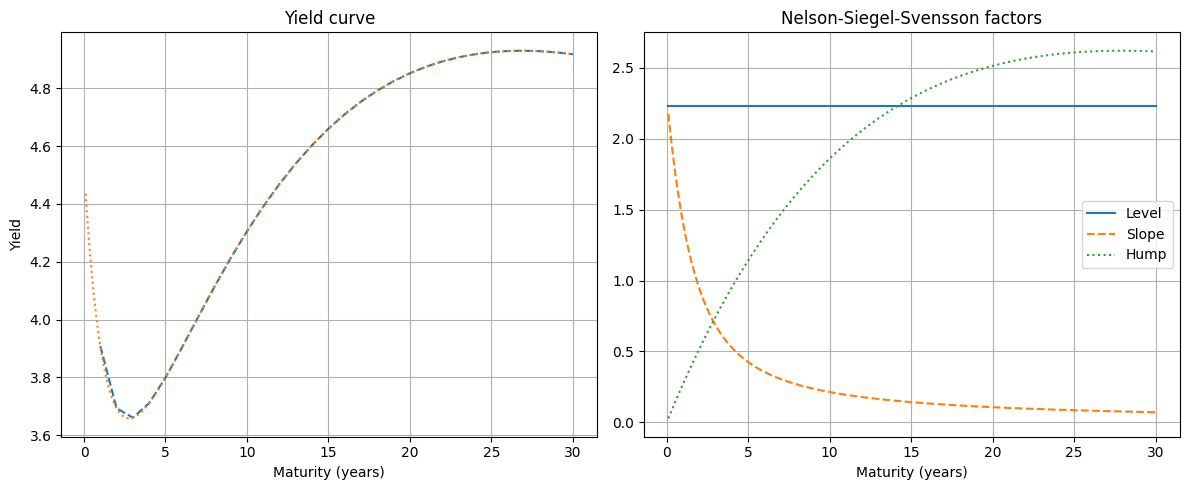

In [18]:
import numpy as np
import matplotlib.pyplot as plt


row = data2.loc[16666]

# Maturities (år 1 til 30)
maturities = np.arange(1, 31)

# Spot rates: kolonner SVENPY01 til SVENPY30
spot_cols = [f'SVENY{str(i).zfill(2)}' for i in maturities]
yields = row[spot_cols].values  # divider med 100 for at få procent til decimaltal

# NSS-parametre
beta0 = row['BETA0']
beta1 = row['BETA1']
beta2 = row['BETA2']
beta3 = row['BETA3']
tau1 = 0.930333
tau2 = 15.562048

# Funktion til NSS dekomponering
def nss_decompose(tau):
    term1 = (1 - np.exp(-tau / tau1)) / (tau / tau1)
    term2 = term1 - np.exp(-tau / tau1)
    term3 = (1 - np.exp(-tau / tau2)) / (tau / tau2) - np.exp(-tau / tau2)
    level = beta0 * np.ones_like(tau)
    slope = beta1 * term1
    hump = beta2 * term2 + beta3 * term3
    return level, slope, hump

# Beregn komponenter
tau = np.linspace(0.1, 30, 300)
level, slope, hump = nss_decompose(tau)
nss_curve = level + slope + hump


# Plot
plt.figure(figsize=(12, 5))

# Venstre: yield curve
plt.subplot(1, 2, 1)
plt.plot(maturities, yields, linestyle='--')
plt.plot(tau, nss_curve, label='NSS fit', linestyle=':')
plt.title('Yield curve')
plt.xlabel('Maturity (years)')
plt.ylabel('Yield')
plt.grid(True)

# Højre: NSS faktorer
plt.subplot(1, 2, 2)
plt.plot(tau, level, label='Level', linestyle='-')
plt.plot(tau, slope, label='Slope', linestyle='--')
plt.plot(tau, hump, label='Hump', linestyle=':')
plt.title('Nelson-Siegel-Svensson factors')
plt.xlabel('Maturity (years)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Variational Autoencoder

In [61]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler 
import numpy as np

data_clean = data2.dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_clean)
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

X_tensor.shape[1]

print(X_scaled)


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>)

In [ ]:
batch_size = 64
dataset = TensorDataset(X_tensor)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

input_dim = X_tensor.shape[1]
latent_dim = 2  # You used 2 units in the bottleneck of your Keras model

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim=15, latent_dim=latent_dim):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU()
        )
        
        self.fc_mean = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.LeakyReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(),
            nn.Linear(hidden_dim, input_dim)
        )

    def encode(self, x):
        h = self.encoder(x)
        return self.fc_mean(h), self.fc_logvar(h)

    def reparameterize(self, mean, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mean + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mean, logvar = self.encode(x)
        z = self.reparameterize(mean, logvar)
        x_hat = self.decode(z)
        return x_hat, mean, logvar


In [ ]:
#ELBO-loss

beta = 1

def vae_loss(x, x_hat, mean, logvar):
    recon_loss = nn.functional.mse_loss(x_hat, x, reduction='sum')
    kl_div = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp())
    return recon_loss + beta*kl_div


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE(input_dim=input_dim, latent_dim=latent_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

epochs = 50

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch in train_loader:
        x = batch[0].to(device)

        optimizer.zero_grad()
        x_hat, mean, logvar = model(x)
        loss = vae_loss(x, x_hat, mean, logvar)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {train_loss / len(train_loader.dataset):.4f}")


Epoch 1, Loss: 19.6465
Epoch 2, Loss: 4.8006
Epoch 3, Loss: 3.9572
Epoch 4, Loss: 3.5928
Epoch 5, Loss: 3.4751
Epoch 6, Loss: 3.4149
Epoch 7, Loss: 3.4190
Epoch 8, Loss: 3.4025
Epoch 9, Loss: 3.3947
Epoch 10, Loss: 3.3921
Epoch 11, Loss: 3.3793
Epoch 12, Loss: 3.3694
Epoch 13, Loss: 3.3828
Epoch 14, Loss: 3.3634
Epoch 15, Loss: 3.3646
Epoch 16, Loss: 3.3581
Epoch 17, Loss: 3.3595
Epoch 18, Loss: 3.3524
Epoch 19, Loss: 3.3637
Epoch 20, Loss: 3.3418
Epoch 21, Loss: 3.3382
Epoch 22, Loss: 3.3511
Epoch 23, Loss: 3.3450
Epoch 24, Loss: 3.3441
Epoch 25, Loss: 3.3448
Epoch 26, Loss: 3.3312
Epoch 27, Loss: 3.3386
Epoch 28, Loss: 3.3264
Epoch 29, Loss: 3.3341
Epoch 30, Loss: 3.3304
Epoch 31, Loss: 3.3266
Epoch 32, Loss: 3.3118
Epoch 33, Loss: 3.3196
Epoch 34, Loss: 3.3237
Epoch 35, Loss: 3.3190
Epoch 36, Loss: 3.3247
Epoch 37, Loss: 3.2985
Epoch 38, Loss: 3.3244
Epoch 39, Loss: 3.3016
Epoch 40, Loss: 3.3086
Epoch 41, Loss: 3.3047
Epoch 42, Loss: 3.3229
Epoch 43, Loss: 3.3069
Epoch 44, Loss: 3.2

In [ ]:
model.eval()
latent_means = []

with torch.no_grad():
    for batch in train_loader:
        x = batch[0].to(device)
        _, mean, _ = model(x)
        latent_means.append(mean.cpu())

latent_means = torch.cat(latent_means, dim=0)  # alle latent means samlet i én tensor

print(latent_means.shape)

torch.Size([9850, 2])


In [ ]:
import pandas as pd

# Convert tensor to numpy array
latent_np = latent_means.numpy()

# Create a DataFrame (optional: give column names)
df_latent = pd.DataFrame(latent_np, columns=[f'latent_dim_{i+1}' for i in range(latent_np.shape[1])])

# Save to CSV
#df_latent.to_csv('latent_space.csv', index=False)


In [ ]:
model.eval()
with torch.no_grad():
    X_recon, _, _ = model(X_tensor.to(device))
    reconstruction_error = torch.mean((X_tensor.to(device) - X_recon) ** 2, dim=1).cpu().numpy()

threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold

print("Anomalies detected:", np.sum(anomalies))


Anomalies detected: 493


In [ ]:
model.eval()
with torch.no_grad():
    X_reconstructed = model(X_tensor.to(device))[0].cpu().numpy()  # model returns (x_hat, mean, logvar)


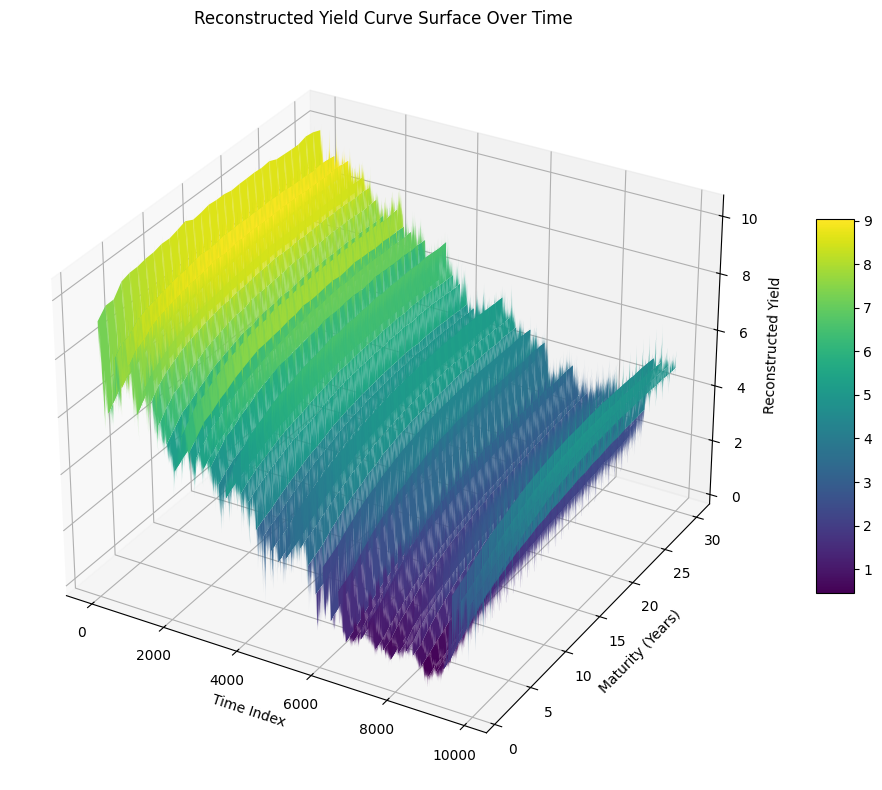

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Inverse transform the reconstruction to original scale
X_reconstructed_original = scaler.inverse_transform(X_reconstructed)

# Step 2: Recreate DataFrame from the reconstructed data
reconstructed_df = pd.DataFrame(X_reconstructed_original, columns=data_clean.columns)

# Step 3: Extract and sort SVENY columns (e.g., SVENY01 to SVENY30)
maturity_cols = [col for col in reconstructed_df.columns if col.startswith("SVENY")]
maturity_cols_sorted = sorted(maturity_cols, key=lambda x: int(x.replace("SVENY", "")))

# Step 4: Create meshgrid
X_time = np.arange(len(reconstructed_df))  # Time index
Y_maturities = np.array([int(col.replace("SVENY", "")) for col in maturity_cols_sorted])
Z_yields = reconstructed_df[maturity_cols_sorted].values

# Validate dimensions
assert Z_yields.shape == (len(X_time), len(Y_maturities)), "Shape mismatch for Z matrix"

X_mesh, Y_mesh = np.meshgrid(X_time, Y_maturities, indexing='ij')

# Step 5: Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X_mesh, Y_mesh, Z_yields, cmap='viridis', linewidth=0, antialiased=True)

ax.set_xlabel('Time Index')
ax.set_ylabel('Maturity (Years)')
ax.set_zlabel('Reconstructed Yield')
ax.set_title('Reconstructed Yield Curve Surface Over Time')

plt.colorbar(surf, shrink=0.5, aspect=10)
plt.tight_layout()
plt.show()


#### Testing VAE

# PART II - predicting tomorrows 

## Loading the data

In [75]:
import pandas as pd

df = plot_data.dropna()

df = df.drop(columns=['BETA0', 'BETA1', 'BETA2'], errors='ignore')

#Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

#Define the cutoff dates
train_end = pd.Timestamp('2018-01-01')
val_end = pd.Timestamp('2025-01-01')

#Create the splits
train_df = df[df['Date'] < train_end]
val_df = df[(df['Date'] >= train_end) & (df['Date'] < val_end)]
test_df = df[df['Date'] >= val_end]

#Optionally check the sizes
print(f"Train set: {len(train_df)} rows")
print(f"Validation set: {len(val_df)} rows")
print(f"Test set: {len(test_df)} rows")

Train set: 8234 rows
Validation set: 1750 rows
Test set: 89 rows


## Baseline/naive model

In [76]:
from sklearn.metrics import mean_squared_error
import pandas as pd

# Sørg for at have val_df og test_df med 'Date' og kolonne "2"
val_df = val_df.copy()
val_df['naive_pred'] = val_df['2'].shift(1)
val_df = val_df.dropna(subset=['naive_pred'])

val_mse = mean_squared_error(val_df['2'], val_df['naive_pred'])
print(f"Naiv model MSE (validation): {val_mse:.4f}")

# Gentag for test_df
test_df = test_df.copy()
test_df['naive_pred'] = test_df['2'].shift(1)
test_df = test_df.dropna(subset=['naive_pred'])

test_mse = mean_squared_error(test_df['2'], test_df['naive_pred'])
print(f"Naiv model MSE (test): {test_mse:.4f}")


val_df = val_df.copy()
val_df['naive_pred'] = val_df['20'].shift(1)
val_df = val_df.dropna(subset=['naive_pred'])

val_mse = mean_squared_error(val_df['20'], val_df['naive_pred'])
print(f"Naiv model MSE (validation): {val_mse:.4f}")

# Gentag for test_df
test_df = test_df.copy()
test_df['naive_pred'] = test_df['20'].shift(1)
test_df = test_df.dropna(subset=['naive_pred'])

test_mse = mean_squared_error(test_df['20'], test_df['naive_pred'])
print(f"Naiv model MSE (test): {test_mse:.4f}")


Naiv model MSE (validation): 0.0032
Naiv model MSE (test): 0.0036
Naiv model MSE (validation): 0.0031
Naiv model MSE (test): 0.0037


In [77]:
from sklearn.metrics import mean_squared_error
import pandas as pd

# ----------- Kolonne "2" -----------

val_df_2 = val_df.copy()
val_df_2['naive_pred'] = val_df_2['2']
val_df_2['target'] = val_df_2['2'].shift(-10) 
val_df_2 = val_df_2.dropna(subset=['target'])

val_mse_2 = mean_squared_error(val_df_2['target'], val_df_2['naive_pred'])
print(f"Naiv model MSE (validation, col 2, 10-dages): {val_mse_2:.4f}")

test_df_2 = test_df.copy()
test_df_2['naive_pred'] = test_df_2['2']
test_df_2['target'] = test_df_2['2'].shift(-10)
test_df_2 = test_df_2.dropna(subset=['target'])

test_mse_2 = mean_squared_error(test_df_2['target'], test_df_2['naive_pred'])
print(f"Naiv model MSE (test, col 2, 10-dages): {test_mse_2:.4f}")

# ----------- Kolonne "20" -----------

val_df_20 = val_df.copy()
val_df_20['naive_pred'] = val_df_20['20']
val_df_20['target'] = val_df_20['20'].shift(-10)
val_df_20 = val_df_20.dropna(subset=['target'])

val_mse_20 = mean_squared_error(val_df_20['target'], val_df_20['naive_pred'])
print(f"Naiv model MSE (validation, col 20, 10-dages): {val_mse_20:.4f}")

test_df_20 = test_df.copy()
test_df_20['naive_pred'] = test_df_20['20']
test_df_20['target'] = test_df_20['20'].shift(-10)
test_df_20 = test_df_20.dropna(subset=['target'])

test_mse_20 = mean_squared_error(test_df_20['target'], test_df_20['naive_pred'])
print(f"Naiv model MSE (test, col 20, 10-dages): {test_mse_20:.4f}")


Naiv model MSE (validation, col 2, 10-dages): 0.0328
Naiv model MSE (test, col 2, 10-dages): 0.0220
Naiv model MSE (validation, col 20, 10-dages): 0.0277
Naiv model MSE (test, col 20, 10-dages): 0.0264


## First prediction

Naiv baseline MSE (val): 0.0277
Naiv baseline MSE (test): 0.0264
Train shape: (8234, 300), Val shape: (1750, 300), Test shape: (79, 300)


/var/folders/yn/lvxby3lj7nd2v75kj5sp86740000gn/T/ipykernel_34234/3990704441.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag_{lag}'] = df[col].shift(lag)
/var/folders/yn/lvxby3lj7nd2v75kj5sp86740000gn/T/ipykernel_34234/3990704441.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag_{lag}'] = df[col].shift(lag)
/var/folders/yn/lvxby3lj7nd2v75kj5sp86740000gn/T/ipykernel_34234/3990704441.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

[0]	validation_0-rmse:2.99553
[1]	validation_0-rmse:2.85773
[2]	validation_0-rmse:2.72879
[3]	validation_0-rmse:2.60786
[4]	validation_0-rmse:2.48772
[5]	validation_0-rmse:2.37265
[6]	validation_0-rmse:2.26312
[7]	validation_0-rmse:2.16051
[8]	validation_0-rmse:2.06681
[9]	validation_0-rmse:1.97361
[10]	validation_0-rmse:1.88798
[11]	validation_0-rmse:1.80649
[12]	validation_0-rmse:1.72913
[13]	validation_0-rmse:1.65321
[14]	validation_0-rmse:1.59121
[15]	validation_0-rmse:1.52287
[16]	validation_0-rmse:1.45831
[17]	validation_0-rmse:1.39657
[18]	validation_0-rmse:1.34732
[19]	validation_0-rmse:1.30140
[20]	validation_0-rmse:1.25739
[21]	validation_0-rmse:1.21605
[22]	validation_0-rmse:1.16911
[23]	validation_0-rmse:1.13236
[24]	validation_0-rmse:1.09740
[25]	validation_0-rmse:1.06404
[26]	validation_0-rmse:1.02604
[27]	validation_0-rmse:0.99736
[28]	validation_0-rmse:0.96384
[29]	validation_0-rmse:0.93587
[30]	validation_0-rmse:0.91033
[31]	validation_0-rmse:0.88701
[32]	validation_0-

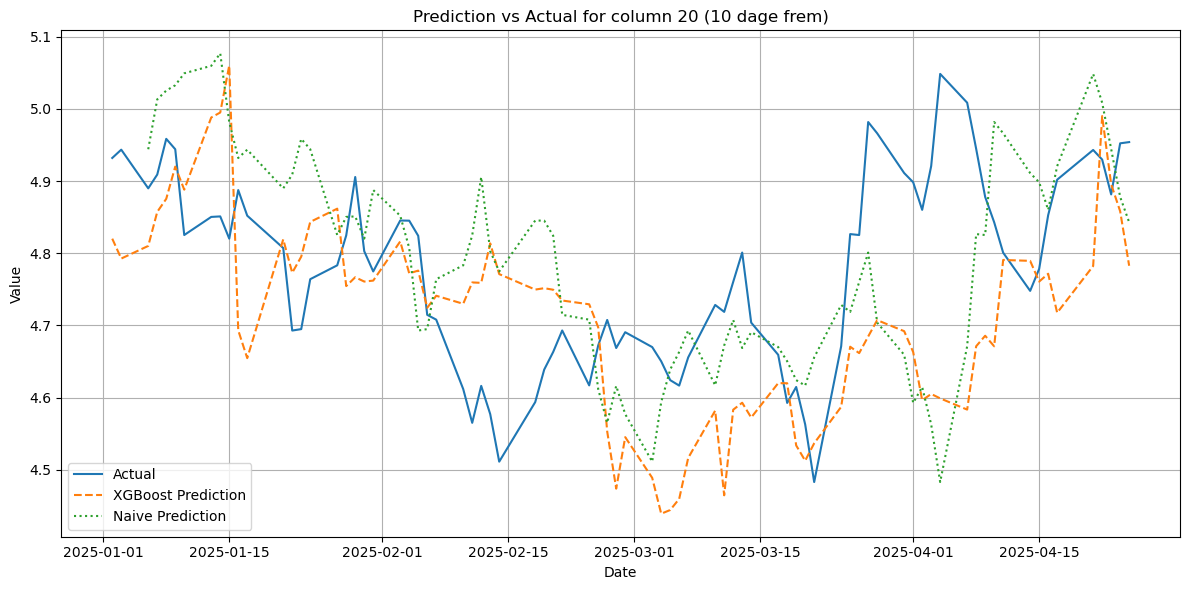

In [88]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# --- Eksempel: antag df har kolonner 'Date' og '20' ---

target_col = "20"
forecast_horizon = 10

# Baseline: Naiv model
def naive_baseline(df, target_col, horizon):
    df = df.copy()
    df['target'] = df[target_col].shift(-horizon)
    df = df.dropna(subset=['target'])
    df['naive_pred'] = df[target_col]
    mse = mean_squared_error(df['target'], df['naive_pred'])
    return mse, df

# Opret lag features til XGBoost
def create_lag_features(df, col, n_lags):
    df = df.sort_values('Date').copy()
    for lag in range(1, n_lags+1):
        df[f'{col}_lag_{lag}'] = df[col].shift(lag)
    df[f'{col}_target'] = df[col].shift(-forecast_horizon)
    df = df.dropna(subset=[f'{col}_target'])
    return df

# Indlæs dine data i df, som skal indeholde 'Date' og target_col

# Lav naive baseline på validering og test sæt:
val_mse, val_df_baseline = naive_baseline(val_df, target_col, forecast_horizon)
test_mse, test_df_baseline = naive_baseline(test_df, target_col, forecast_horizon)

print(f"Naiv baseline MSE (val): {val_mse:.4f}")
print(f"Naiv baseline MSE (test): {test_mse:.4f}")

# Lav lag features til XGBoost
n_lags = 300  # Start med fx 30, kan justeres
df_lagged = create_lag_features(df, target_col, n_lags)

# Definér datointervaller for træning, validering og test
train_start = df['Date'].min()
train_end = pd.Timestamp('2017-12-31')
val_end = pd.Timestamp('2024-12-31')
test_start = pd.Timestamp('2025-01-01')
test_end = pd.Timestamp('2025-05-08')

# Filter data til hvert sæt
train_mask = (df_lagged['Date'] >= train_start) & (df_lagged['Date'] <= train_end)
val_mask = (df_lagged['Date'] > train_end) & (df_lagged['Date'] <= val_end)
test_mask = (df_lagged['Date'] >= test_start) & (df_lagged['Date'] <= test_end)

features = [f'{target_col}_lag_{lag}' for lag in range(1, n_lags+1)]

X_train = df_lagged.loc[train_mask, features]
y_train = df_lagged.loc[train_mask, f'{target_col}_target']

X_val = df_lagged.loc[val_mask, features]
y_val = df_lagged.loc[val_mask, f'{target_col}_target']

X_test = df_lagged.loc[test_mask, features]
y_test = df_lagged.loc[test_mask, f'{target_col}_target']

print(f"Train shape: {X_train.shape}, Val shape: {X_val.shape}, Test shape: {X_test.shape}")

# Træn XGBoost model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    verbosity=1
)
model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

# Predict og evaluer på test sæt
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost Test RMSE: {rmse:.4f}")

# Plot resultater
plt.figure(figsize=(12, 6))
plt.plot(df_lagged.loc[test_mask, 'Date'], y_test, label='Actual')
plt.plot(df_lagged.loc[test_mask, 'Date'], y_pred, label='XGBoost Prediction', linestyle='--')
plt.plot(test_df_baseline.loc[test_df_baseline['Date'].isin(df_lagged.loc[test_mask, 'Date'])]['Date'], 
         test_df_baseline.loc[test_df_baseline['Date'].isin(df_lagged.loc[test_mask, 'Date'])]['naive_pred'], 
         label='Naive Prediction', linestyle=':')
plt.title(f'Prediction vs Actual for column {target_col} (10 dage frem)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [87]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Simuler eller brug din eksisterende df
# Sørg for at Date er datetime
df['Date'] = pd.to_datetime(df['Date'])

target_col = "20"
n_lags = 10000  # Start med færre lags for test
lag_buffer_days = n_lags

def create_lag_features(df, col, n_lags):
    df = df.sort_values("Date").copy()
    for lag in range(1, n_lags + 1):
        df[f'{col}_lag_{lag}'] = df[col].shift(lag)
    return df.dropna()

df_lagged = create_lag_features(df, target_col, n_lags)

# Tjek at lag faktisk er lavet
print(df_lagged[[target_col] + [f"{target_col}_lag_{i}" for i in range(1,6)]].head())

# Sæt tidsrammer (tilpas så de passer til dine data)
train_start = df_lagged['Date'].min()
train_end = pd.Timestamp("2017-12-31")
val_end = pd.Timestamp("2024-12-31")
test_start = pd.Timestamp("2025-01-01")
test_end = pd.Timestamp("2025-05-08")

# Sørg for at vi kun har rækker fra før test_start - lag_buffer_days (for at have lagdata til test)
min_required_date = test_start - pd.Timedelta(days=lag_buffer_days)
df_model = df_lagged[df_lagged['Date'] >= min_required_date].copy()

# Split dataset
train_mask = (df_model['Date'] >= train_start) & (df_model['Date'] <= train_end)
val_mask = (df_model['Date'] > train_end) & (df_model['Date'] <= val_end)
test_mask = (df_model['Date'] >= test_start) & (df_model['Date'] <= test_end)

X_train = df_model.loc[train_mask].drop(columns=[target_col, 'Date'])
y_train = df_model.loc[train_mask][target_col]

X_val = df_model.loc[val_mask].drop(columns=[target_col, 'Date'])
y_val = df_model.loc[val_mask][target_col]

X_test = df_model.loc[test_mask].drop(columns=[target_col, 'Date'])
y_test = df_model.loc[test_mask][target_col]

print(f"Train shape: {X_train.shape}")
print(f"Val shape: {X_val.shape}")
print(f"Test shape: {X_test.shape}")

print(f"Train y stats:\n{y_train.describe()}")
print(f"Val y stats:\n{y_val.describe()}")
print(f"Test y stats:\n{y_test.describe()}")

if X_train.shape[0] == 0:
    print("FEJL: Træningsdatasættet er tomt! Check datoerne og lag feature oprettelsen.")
else:
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=1000,
        max_depth=10,
        learning_rate=0.05,
        verbosity=1
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Test RMSE: {rmse:.4f}')

    plt.figure(figsize=(12, 6))
    plt.plot(df_model.loc[test_mask, 'Date'], y_test, label='Actual')
    plt.plot(df_model.loc[test_mask, 'Date'], y_pred, label='Predicted', linestyle='--')
    plt.title(f'XGBoost Prediction vs Actual for Column {target_col}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


/var/folders/yn/lvxby3lj7nd2v75kj5sp86740000gn/T/ipykernel_34234/620443989.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag_{lag}'] = df[col].shift(lag)
/var/folders/yn/lvxby3lj7nd2v75kj5sp86740000gn/T/ipykernel_34234/620443989.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag_{lag}'] = df[col].shift(lag)
/var/folders/yn/lvxby3lj7nd2v75kj5sp86740000gn/T/ipykernel_34234/620443989.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

           20  20_lag_1  20_lag_2  20_lag_3  20_lag_4  20_lag_5
16598  4.8252    4.9441    4.9585    4.9090    4.8899    4.9435
16599  4.8503    4.8252    4.9441    4.9585    4.9090    4.8899
16600  4.8510    4.8503    4.8252    4.9441    4.9585    4.9090
16601  4.8202    4.8510    4.8503    4.8252    4.9441    4.9585
16602  4.8875    4.8202    4.8510    4.8503    4.8252    4.9441
Train shape: (0, 10019)
Val shape: (0, 10019)
Test shape: (72, 10019)
Train y stats:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 20, dtype: float64
Val y stats:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 20, dtype: float64
Test y stats:
count    72.000000
mean      4.765410
std       0.128354
min       4.482800
25%       4.667250
50%       4.776500
75%       4.852175
max       5.048500
Name: 20, dtype: float64
FEJL: Træningsdatasættet er tomt! Check datoerne og lag feature opret

In [80]:
print(train_start)

1985-01-02 00:00:00


Train shape: (0, 749), Val shape: (500, 749), Test shape: (88, 749)
Train target stats:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 20, dtype: float64
Val target stats:
count    500.000000
mean       4.339153
std        0.374113
min        3.586400
25%        4.027625
50%        4.415400
75%        4.586275
max        5.290900
Name: 20, dtype: float64
Test target stats:
count    88.000000
mean      4.803141
std       0.143478
min       4.482800
25%       4.685925
50%       4.824400
75%       4.911650
max       5.077000
Name: 20, dtype: float64
Test RMSE: 4.8053
Prediction stats:
count    88.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64


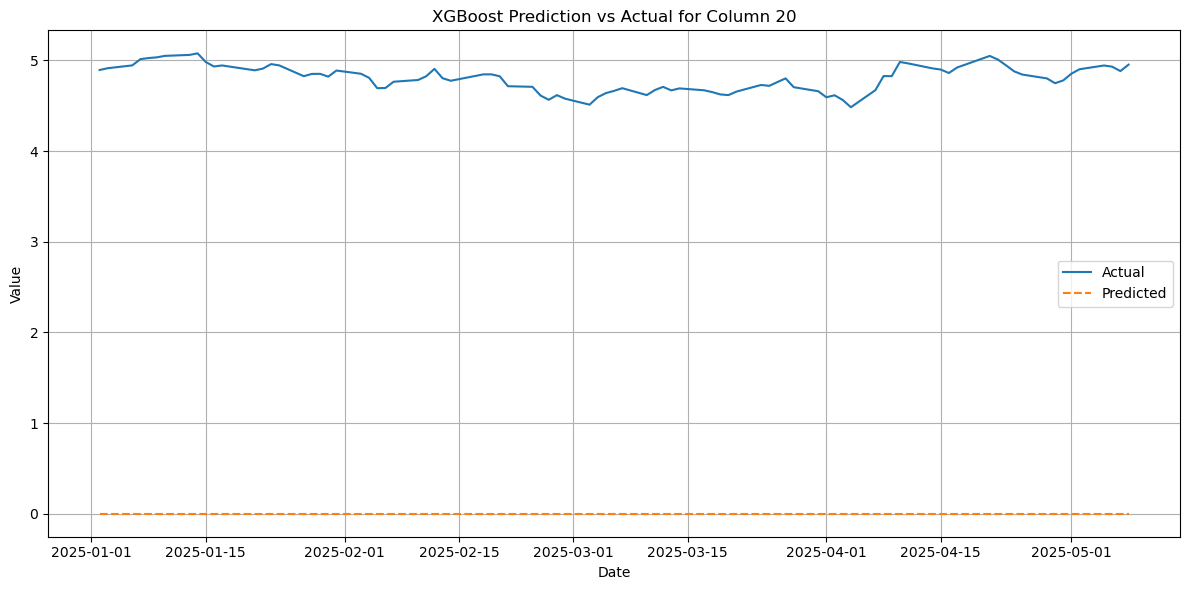

In [82]:
print(f"Train shape: {X_train.shape}, Val shape: {X_val.shape}, Test shape: {X_test.shape}")
print(f"Train target stats:\n{y_train.describe()}")
print(f"Val target stats:\n{y_val.describe()}")
print(f"Test target stats:\n{y_test.describe()}")

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    max_depth=10,
    learning_rate=0.05,
    verbosity=2
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse:.4f}')
print(f"Prediction stats:\n{pd.Series(y_pred).describe()}")

plt.figure(figsize=(12, 6))
plt.plot(df_model.loc[test_mask, 'Date'], y_test, label='Actual')
plt.plot(df_model.loc[test_mask, 'Date'], y_pred, label='Predicted', linestyle='--')
plt.title(f'XGBoost Prediction vs Actual for Column {target_col}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[0]	train-rmse:2.27637	eval-rmse:0.68851
[1]	train-rmse:2.16355	eval-rmse:0.65577
[2]	train-rmse:2.05640	eval-rmse:0.61950
[3]	train-rmse:1.95457	eval-rmse:0.58799
[4]	train-rmse:1.85785	eval-rmse:0.55481
[5]	train-rmse:1.76595	eval-rmse:0.52324
[6]	train-rmse:1.67864	eval-rmse:0.49422
[7]	train-rmse:1.59568	eval-rmse:0.46594
[8]	train-rmse:1.51685	eval-rmse:0.43990
[9]	train-rmse:1.44197	eval-rmse:0.41984
[10]	train-rmse:1.37082	eval-rmse:0.40137
[11]	train-rmse:1.30322	eval-rmse:0.38135
[12]	train-rmse:1.23897	eval-rmse:0.36357
[13]	train-rmse:1.17792	eval-rmse:0.34664
[14]	train-rmse:1.11992	eval-rmse:0.33281
[15]	train-rmse:1.06480	eval-rmse:0.31671
[16]	train-rmse:1.01244	eval-rmse:0.30155
[17]	train-rmse:0.96266	eval-rmse:0.28854
[18]	train-rmse:0.91539	eval-rmse:0.27556
[19]	train-rmse:0.87046	eval-rmse:0.26106
[20]	train-rmse:0.82776	eval-rmse:0.25076
[21]	train-rmse:0.78720	eval-rmse:0.23790
[22]	train-rmse:0.74864	eval-rmse:0.23083
[23]	train-rmse:0.71200	eval-rmse:0.22090
[2

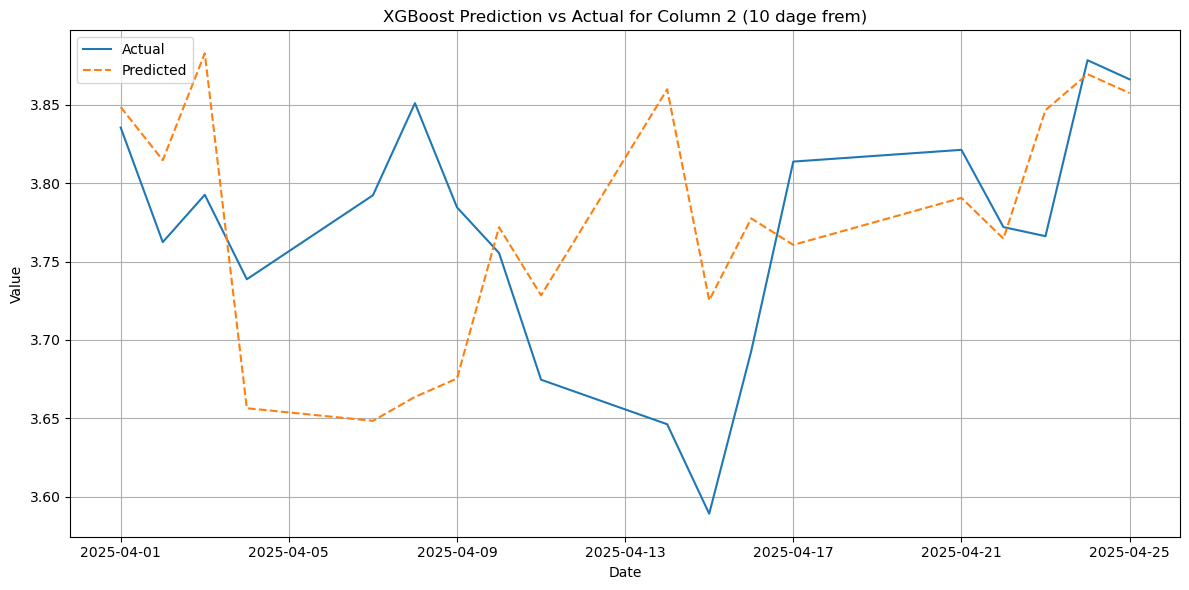

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Parametre
target_col = "2"
n_lags = 730
forecast_horizon = 10

# Funktion til at lave lag features + mål 10 dage frem
def create_lag_features(df, col, n_lags=730, forecast_horizon=10):
    df = df.sort_values("Date").copy()
    
    # Target kolonne: værdien forecast_horizon dage frem
    df[f'{col}_target_{forecast_horizon}'] = df[col].shift(-forecast_horizon)
    
    # Base med Date og target
    base = df[["Date", f'{col}_target_{forecast_horizon}']].copy()

    # Laggede features: værdier op til n_lags dage tilbage
    lagged_features = [
        df[col].shift(lag).rename(f'{col}_lag_{lag}')
        for lag in range(1, n_lags + 1)
    ]
    
    lagged_df = pd.concat([base] + lagged_features, axis=1)
    
    # Drop rækker med NA (pga. shift)
    return lagged_df.dropna()

# Load og forbered data (du skal have din dataframe df klar med Date og target_col)

# Lav laggede features + target 10 dage frem
df_lagged = create_lag_features(df, target_col, n_lags, forecast_horizon)


# Navnet på den nye target-kolonne
target_col_forecast = f"{target_col}_target_{forecast_horizon}"

# Vælg kolonner til model
lag_cols = [col for col in df_lagged.columns if col.startswith(f'{target_col}_lag_')]
df_model = df_lagged[['Date', target_col_forecast] + lag_cols].copy()

# Train / val / test masker
train_mask = (df_model['Date'] >= train_start) & (df_model['Date'] <= train_end)
val_mask = (df_model['Date'] > train_end) & (df_model['Date'] <= val_end)
test_mask = (df_model['Date'] >= test_start) & (df_model['Date'] <= test_end)

# Features og target arrays
X_train = df_model.loc[train_mask].drop(columns=[target_col_forecast, 'Date'])
y_train = df_model.loc[train_mask][target_col_forecast]

X_val = df_model.loc[val_mask].drop(columns=[target_col_forecast, 'Date'])
y_val = df_model.loc[val_mask][target_col_forecast]

X_test = df_model.loc[test_mask].drop(columns=[target_col_forecast, 'Date'])
y_test = df_model.loc[test_mask][target_col_forecast]

# XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parametre til træning
params = {
    "objective": "reg:squarederror",
    "max_depth": 10,
    "eta": 0.05,
    "verbosity": 1
}

evallist = [(dtrain, 'train'), (dval, 'eval')]

# Train model med early stopping
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=evallist,
    early_stopping_rounds=20,
    verbose_eval=True
)

# Predict på test data
y_pred = bst.predict(dtest)

# Evaluer
mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse:.4f}')

# Plot resultat
plt.figure(figsize=(12, 6))
plt.plot(df_model.loc[test_mask, 'Date'], y_test, label='Actual')
plt.plot(df_model.loc[test_mask, 'Date'], y_pred, label='Predicted', linestyle='--')
plt.title(f'XGBoost Prediction vs Actual for Column {target_col} ({forecast_horizon} dage frem)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [68]:
y_pred = bst.predict(dval)
mse = mean_squared_error(y_val, y_pred)
print(f'Val MSE: {mse:.4f}')

Val MSE: 0.0184


In [35]:
def rolling_forecast(df, model, features, target_col, start_date, steps):
    # Start med data op til start_date
    history = df[df['Date'] <= start_date].copy()
    forecasts = []

    for step in range(steps):
        last_row = history.iloc[-1]
        new_date = last_row['Date'] + pd.Timedelta(days=1)

        # Lav en ny række til prediction
        new_row = {'Date': new_date}
        for feat in features:
            lag = int(feat.split('lag')[-1])
            new_row[feat] = history[target_col].iloc[-lag]

        X_new = pd.DataFrame([new_row])[features]
        y_pred = model.predict(X_new)[0]

        # Gem prediction
        forecasts.append({'Date': new_date, target_col: y_pred})

        # Få faktisk værdi hvis den findes (fra df)
        actual_row = df[df['Date'] == new_date]
        if not actual_row.empty:
            actual_value = actual_row[target_col].values[0]
        else:
            actual_value = y_pred  # Hvis du ikke har faktisk, brug prediction (kan også droppe)

        # Tilføj den faktiske værdi til historikken for næste iteration
        new_history_row = {'Date': new_date, target_col: actual_value}
        for lag in lags:
            # genberegn lag features for denne nye række
            lag_val = history[target_col].iloc[-lag + 1] if (len(history) >= lag) else np.nan
            new_history_row[f'{target_col}_lag{lag}'] = lag_val

        history = pd.concat([history, pd.DataFrame([new_history_row])], ignore_index=True)
        history = history.dropna().reset_index(drop=True)

    return pd.DataFrame(forecasts)


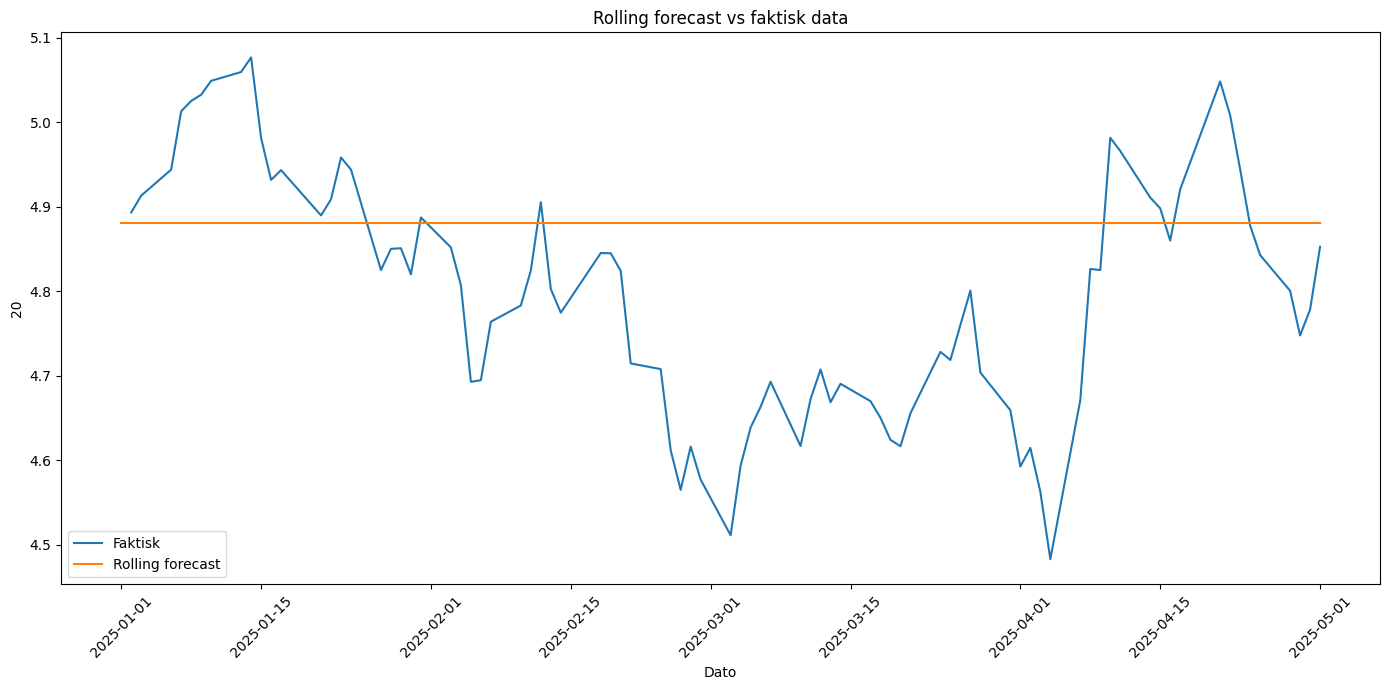

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

# ===== 1. Funktion til at lave lag features =====
def create_lag_features(df, target_col, lags=[1,2,3,5,7,14,30,60,180,360]):
    df = df.copy()
    for lag in lags:
        df[f'{target_col}_lag{lag}'] = df[target_col].shift(lag)
    df = df.dropna().reset_index(drop=True)
    return df

# ===== 2. Rolling forecast funktion (walk-forward) =====
def rolling_forecast(df, model, features, target_col, start_date, steps, lags):
    history = df[df['Date'] <= start_date].copy()

    forecasts = []

    for step in range(steps):
        last_date = history['Date'].iloc[-1]
        new_date = last_date + pd.Timedelta(days=1)

        # Lav lag features på history + ny række med NaN i target
        new_row = pd.DataFrame([{ 'Date': new_date, target_col: np.nan }])
        temp = pd.concat([history, new_row], ignore_index=True)
        temp = create_lag_features(temp, target_col, lags)

        # Tag sidste række som input features til modellen
        X_new = temp.iloc[[-1]][features]

        y_pred = model.predict(X_new)[0]

        # Gem forecast
        forecasts.append({'Date': new_date, target_col: y_pred})

        # Find faktisk værdi, hvis den findes i df
        actual_row = df[df['Date'] == new_date]
        if not actual_row.empty:
            actual_value = actual_row[target_col].values[0]
        else:
            actual_value = y_pred

        # Tilføj ny række med faktisk værdi til historik
        new_history_row = pd.DataFrame([{ 'Date': new_date, target_col: actual_value }])
        history = pd.concat([history, new_history_row], ignore_index=True)

    return pd.DataFrame(forecasts)



# ===== 3. Opsætning =====
target_col = '20'  # Erstat med dit target kolonnenavn
lags = [1,2,3,5,7,14,30,60,180,360]

# Antag at df allerede indeholder 'Date' som datetime og target_col

# 4. Lav lag features
df = create_lag_features(df, target_col, lags)

# 5. Definer features som alle lag kolonner
features = [f'{target_col}_lag{lag}' for lag in lags]

# 6. Split data til træning: alt til og med 31/12/2024
cutoff_date = pd.Timestamp('2024-12-31')
train_until_cutoff = df[df['Date'] <= cutoff_date].copy()

X_train = train_until_cutoff[features]
y_train = train_until_cutoff[target_col]

# 7. Træn XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200)
model.fit(X_train, y_train)

# 8. Rolling forecast frem til fx 1. maj 2025
start_date = cutoff_date
forecast_days = (pd.Timestamp('2025-05-01') - cutoff_date).days

forecast_df = rolling_forecast(df, model, features, target_col, start_date, forecast_days, lags)

# 9. Hent faktisk data til samme periode for sammenligning
actual_df = df[(df['Date'] > cutoff_date) & (df['Date'] <= cutoff_date + pd.Timedelta(days=forecast_days))]

# 10. Plot forecast vs faktisk
plt.figure(figsize=(14,7))
plt.plot(actual_df['Date'], actual_df[target_col], label='Faktisk')
plt.plot(forecast_df['Date'], forecast_df[target_col], label='Rolling forecast')
plt.legend()
plt.title('Rolling forecast vs faktisk data')
plt.xlabel('Dato')
plt.ylabel(target_col)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X, y[:, 0])  # Only the first maturity (SVENY01)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [23]:
def predict_next_day(yields, model, lookback = lookback):
    x_next = yields[-lookback:].flatten().reshape(1, -1)
    return model.predict(x_next)[0]


next_day_sveny01 = predict_next_day(yields_only, model)


In [24]:
print(next_day_sveny01)

4.065397


In [27]:
from datetime import date

# Filtrér først, så vælg kolonner, så print
row = data1[data1['Date'] == date(2025, 5, 2)][all_keep_cols]
print(row.values.flatten())


[datetime.date(2025, 5, 2) 3.9884 3.8138 3.7824 3.8242 3.902 3.9961 4.0955
 4.1942 4.2889 4.3779 4.4602 4.5355 4.6037 4.6648 4.7193 4.7673 4.8092
 4.8453 4.8761 4.9019]


In [26]:
mean_squared_error([row.values.flatten()[0]], [next_day_sveny01])

NameError: name 'mean_squared_error' is not defined

## Optimization

### Bayesian optimization

In [ ]:
from skopt.space import Real, Integer

param_space = {
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(2, 30),
    'learning_rate': Real(0.01, 0.9, prior='log-uniform'),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'reg_alpha': Real(1e-8, 10.0, prior='log-uniform'),
    'reg_lambda': Real(1e-8, 10.0, prior='log-uniform'),
    'min_child_weight': Integer(1, 10)
}

In [ ]:
from skopt import BayesSearchCV 
from skopt.space import Real, Integer
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor

opt = BayesSearchCV(
    estimator = model,
    search_spaces = param_space,
    n_iter = 100,  # number of iterations of search (increase for better tuning)
    cv = TimeSeriesSplit(n_splits = 5),  # use if you're dealing with time series
    scoring = 'neg_mean_squared_error',
    n_jobs = -1,
    verbose = 0,
    random_state = 42
)

opt.fit(X, y[:, 4])  # if you're tuning for a single maturity

BayesSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=Non...
                             'min_child_weight': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize'),
                             'reg_alpha': Real(low=1e-08, high=10.0, prior='log-uniform', transform='normalize'),
                             'reg_lambda': Real(low=1e-08, high=10.0, prior='log-uniform', transform='normalize'),
                             'subsample': Real(low=0.6, high=1.0, prior='uniform', transform='normalize')})

In [ ]:
print("Best Parameters:", opt.best_params_)
print("Best CV MSE:", -opt.best_score_)

Best Parameters: OrderedDict({'colsample_bytree': 0.6932257765236367, 'learning_rate': 0.5482033573449862, 'max_depth': 23, 'min_child_weight': 1, 'n_estimators': 424, 'reg_alpha': 9.092118822426415e-06, 'reg_lambda': 3.349928763030377e-05, 'subsample': 0.74902331424974})
Best CV MSE: 0.04152537921624235


Best Parameters: OrderedDict({'colsample_bytree': 0.6932257765236367, 'learning_rate': 0.5482033573449862, 'max_depth': 23, 'min_child_weight': 1, 'n_estimators': 424, 'reg_alpha': 9.092118822426415e-06, 'reg_lambda': 3.349928763030377e-05, 'subsample': 0.74902331424974})


### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from xgboost import XGBRegressor

param_dist = {
    'learning_rate': uniform(0.01, 0.29),  # uniform between 0.01 and 0.3
    'max_depth': randint(3, 11),           # integer between 3 and 10
    'n_estimators': randint(50, 201),
    'subsample': uniform(0.5, 0.5),        # uniform between 0.5 and 1.0
    'colsample_bytree': uniform(0.5, 0.5),
}

model = XGBRegressor(objective='reg:squarederror', random_state=42)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter= 1500,
    cv=TimeSeriesSplit(n_splits = 5),
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X, y[:, 4])
print("Best parameters:", random_search.best_params_)
print("Best CV score:", -random_search.best_score_)


Fitting 5 folds for each of 1500 candidates, totalling 7500 fits
Best parameters: {'colsample_bytree': np.float64(0.5497206963796726), 'learning_rate': np.float64(0.08051993538984167), 'max_depth': 8, 'n_estimators': 81, 'subsample': np.float64(0.9278482340531429)}
Best CV score: 0.055395055058611434


------------

In [ ]:
# Train single-step-ahead model
X, y, _ = create_xgb_sequences(yields_only, lookback=5, steps_ahead=1)
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X, y[:, 19])  # One-step-ahead model for first maturity


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
recursive_preds = []
current_sequence = yields_only[-5:].copy()  # shape: (5, 20)

for step in range(6):  # predict next 10 days
    x_input = current_sequence.flatten().reshape(1, -1)
    pred = model.predict(x_input)[0]
    recursive_preds.append(pred)

    # Create a new row: clone the last day, update SVENY01 only
    new_row = current_sequence[-1].copy()
    new_row[0] = pred  # only update SVENY01

    # Slide the window forward
    current_sequence = np.vstack([current_sequence[1:], new_row])

    print(f"Day {step+1} SVENY01 prediction: {pred:.4f}")


Day 1 SVENY01 prediction: 4.8350
Day 2 SVENY01 prediction: 4.8357
Day 3 SVENY01 prediction: 4.7933
Day 4 SVENY01 prediction: 4.7818
Day 5 SVENY01 prediction: 4.7692
Day 6 SVENY01 prediction: 4.7724


In [ ]:
from datetime import date

# Select actual SVENY01 values for 10 days starting from 2025-05-02
actual_start_date = date(2025, 5, 2)
actual_slice = data1[data1['Date'] >= actual_start_date].head(6)

actual_sveny01 = actual_slice['SVENY20'].values  # shape: (10,)

# `recursive_preds` should already hold the 10 predicted SVENY01 values
import numpy as np

recursive_preds_arr = np.array(recursive_preds)

print("Day | Actual   | Predicted")
print("----------------------------")
for i, (true_val, pred_val) in enumerate(zip(actual_sveny01, recursive_preds_arr)):
    print(f"{i+1:>3} | {true_val:>8.4f} | {pred_val:>9.4f}")

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(actual_sveny01, recursive_preds_arr)
print(f"\nRMSE over 6-day horizon: {rmse:.4f}")




Day | Actual   | Predicted
----------------------------
  1 |   4.9019 |    4.8350
  2 |   4.9431 |    4.8357
  3 |   4.9298 |    4.7933
  4 |   4.8815 |    4.7818
  5 |   4.9523 |    4.7692
  6 |   4.9540 |    4.7724

RMSE over 6-day horizon: 0.0185


## Optimization

In [ ]:
lookback = 3

data_1year = data2[data2['Date'] >= date(2024, 5, 1)]


import pandas as pd
import numpy as np

# Assume `data2` has Date + SVENY01 to SVENY20, and is cleaned
data = data_1year.copy().reset_index(drop=True)
yields_only = data.drop(columns='Date').values
dates = data['Date'].values

def create_xgb_sequences(yields, lookback = lookback):
    X_list, y_list, date_list = [], [], []
    for i in range(lookback, len(yields) - 1):
        x = yields[i - lookback:i].flatten()    # shape: (lookback * 20,)
        y = yields[i + 1]                        # predict next day
        X_list.append(x)
        y_list.append(y)
        date_list.append(dates[i + 1])           # date of the prediction
    return np.array(X_list), np.array(y_list), np.array(date_list)

X, y, target_dates = create_xgb_sequences(yields_only, lookback = lookback)

In [ ]:
param_space = {
    'n_estimators': Integer(100, 1000),
    'max_depth': Integer(2, 20),
    'learning_rate': Real(0.01, 0.9, prior='log-uniform'),
    #'subsample': Real(0.6, 1.0),
    #'colsample_bytree': Real(0.6, 1.0),
    #'reg_alpha': Real(1e-8, 10.0, prior='log-uniform'),
    #'reg_lambda': Real(1e-8, 10.0, prior='log-uniform'),
    #'min_child_weight': Integer(1, 10)
}

In [ ]:
from skopt import BayesSearchCV 
from skopt.space import Real, Integer
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor

opt = BayesSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    search_spaces=param_space,
    n_iter=30,  # number of iterations of search (increase for better tuning)
    cv=TimeSeriesSplit(n_splits=5),  # use if you're dealing with time series
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0,
    random_state=42
)

opt.fit(X, y[:, 4])  # if you're tuning for a single maturity

BayesSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=Non...
                                     n_jobs=None, num_parallel_tree=None, ...),
              n_iter=30, n_jobs=-1, random_state=42,
              scoring='neg_mean_squared_error',
              search_spaces={'learning_rate': Real(low=0.01, high=0.9, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=1000, prior='uniform', transform='normalize')})

In [ ]:
print("Best Parameters:", opt.best_params_)
print("Best CV MSE:", -opt.best_score_)

Best Parameters: OrderedDict({'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 899})
Best CV MSE: 0.06085237697237378


In [ ]:
from xgboost import XGBRegressor

models = []
preds = []

for i in range(y.shape[1]):  # 20 maturities
    model = XGBRegressor(objective='reg:squarederror', 
                         learning_rate=0.01,
                         n_estimators=899,
                         max_depth=2,
                         random_state=42)
    model.fit(X, y[:, i])
    models.append(model)

    pred = model.predict(X)
    preds.append(pred)

# Stack predictions: shape (n_samples, 20)
all_preds = np.column_stack(preds)

In [ ]:
x_next = yields_only[-lookback:].flatten().reshape(1, -1)

print(x_next)

[[3.8812 3.6462 3.6162 3.6695 3.7565 3.8556 3.9568 4.0551 4.1482 4.235
  4.3148 4.3877 4.4538 4.5131 4.5661 4.6131 4.6544 4.6904 4.7214 4.7478
  3.8405 3.5891 3.5578 3.616  3.7105 3.8178 3.9272 4.0335 4.1341 4.2277
  4.3138 4.3923 4.4633 4.5272 4.5841 4.6345 4.6787 4.7172 4.7503 4.7783
  3.9082 3.6929 3.6601 3.7107 3.7987 3.9017 4.0083 4.1129 4.2125 4.3055
  4.3912 4.4695 4.5404 4.604  4.6607 4.7108 4.7546 4.7927 4.8252 4.8527]]


In [ ]:
# Get the last `lookback` days to form input for next day prediction
x_next = yields_only[-lookback:].flatten().reshape(1, -1)

# Predict with all 20 models
next_day_pred = np.column_stack([model.predict(x_next) for model in models])[0]

In [ ]:
print(next_day_pred)

[3.9868674 3.8451297 3.7721367 3.8193545 3.91502   3.995273  4.0703487
 4.1586514 4.2809453 4.354044  4.437518  4.525201  4.6132903 4.6871815
 4.738212  4.7861056 4.832077  4.8683558 4.8970947 4.9376087]


In [ ]:
from datetime import date

# Filtrér først, så vælg kolonner, så print
row = data1[data1['Date'] == date(2025, 5, 2)][all_keep_cols]
print(row.values.flatten())


[datetime.date(2025, 5, 2) 3.9884 3.8138 3.7824 3.8242 3.902 3.9961 4.0955
 4.1942 4.2889 4.3779 4.4602 4.5355 4.6037 4.6648 4.7193 4.7673 4.8092
 4.8453 4.8761 4.9019]


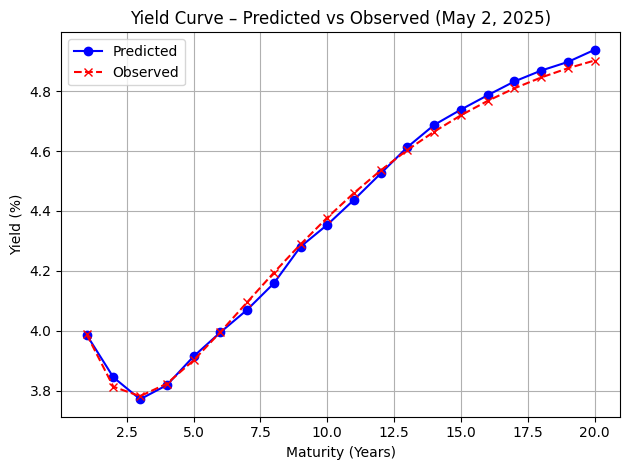

In [ ]:
import matplotlib.pyplot as plt
from datetime import date

# Dato og kolonner til at plotte
maturities = range(1, 21)

# Antag next_day_pred er en liste eller array med 20 predicted værdier
plt.plot(maturities, next_day_pred, marker='o', label='Predicted', color='blue')

# Hent observerede værdier korrekt
observed_row = data1[data1['Date'] == date(2025, 5, 2)]
if not observed_row.empty:
    observed_yields = observed_row[all_keep_cols[1:]].iloc[0].to_numpy()
    plt.plot(maturities, observed_yields, marker='x', linestyle='--', label='Observed', color='red')
else:
    print("No observed data for May 2, 2025")

plt.title("Yield Curve – Predicted vs Observed (May 2, 2025)")
plt.xlabel("Maturity (Years)")
plt.ylabel("Yield (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

if observed_yields is not None:
    mse = mean_squared_error(observed_yields, next_day_pred)
    print(f"Mean Squared Error (MSE): {mse:.6f}")
else:
    print("Observed data not available for May 2, 2025, so MSE can't be calculated.")


Mean Squared Error (MSE): 0.000425


# PART III - GRU

In [59]:
import pandas as pd

df = plot_data.dropna()

#Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

#Define the cutoff dates
train_end = pd.Timestamp('2018-01-01')
val_end = pd.Timestamp('2025-01-01')

#Create the splits
train_df = df[df['Date'] < train_end]
val_df = df[(df['Date'] >= train_end) & (df['Date'] < val_end)]
test_df = df[df['Date'] >= val_end]

#Optionally check the sizes
print(f"Train set: {len(train_df)} rows")
print(f"Validation set: {len(val_df)} rows")
print(f"Test set: {len(test_df)} rows")

Train set: 8234 rows
Validation set: 1750 rows
Test set: 89 rows


/var/folders/yn/lvxby3lj7nd2v75kj5sp86740000gn/T/ipykernel_29092/3303885318.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [94]:
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


target_col = "2"
sequence_length = 50
batch_size = 32

# Skaler kun kolonne 2
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df[[target_col]])
val_scaled = scaler.transform(val_df[[target_col]])
test_scaled = scaler.transform(test_df[[target_col]])

# TimeseriesGenerator
train_gen = TimeseriesGenerator(train_scaled, train_scaled,
                                length=sequence_length, batch_size=batch_size)
val_gen = TimeseriesGenerator(val_scaled, val_scaled,
                              length=sequence_length, batch_size=batch_size)
#test_gen = TimeseriesGenerator(test_scaled, test_scaled,
#                               length=sequence_length, batch_size=batch_size)

# Model: input shape = (sequence_length, 1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense


model = Sequential([
    GRU(64, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)),
    #Dropout(0.2),
    GRU(32, activation='tanh'),
    #Dropout(0.2),
    Dense(2)
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

#early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_gen, validation_data=val_gen, epochs=10)



Epoch 1/10


/opt/anaconda3/envs/appml25/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/envs/appml25/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1778 - val_loss: 0.0030
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 10/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0010 - val_loss: 0.0013


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


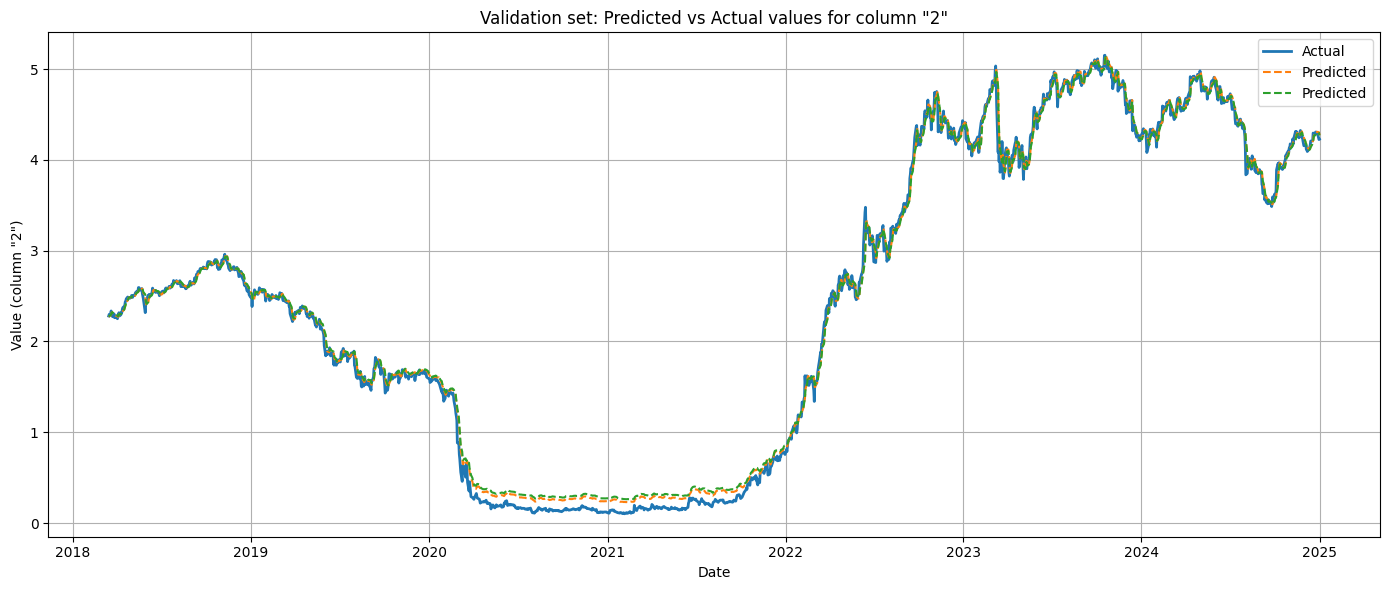

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Forudsig på validerings generatoren
val_preds = model.predict(val_gen)

# Slice target kolonne i val_df (fra sequence_length og frem)
sequence_length = val_gen.length
val_actual_raw = val_df["2"].reset_index(drop=True)[sequence_length:].values.reshape(-1, 1)

# Inverse-transform direkte på slice
val_actual = val_actual_raw

val_preds_rescaled = scaler.inverse_transform(val_preds)

val_dates = val_df['Date'].reset_index(drop=True)[sequence_length:]

plt.figure(figsize=(14, 6))
plt.plot(val_dates, val_actual, label='Actual', linewidth=2)
plt.plot(val_dates, val_preds_rescaled, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value (column "2")')
plt.title('Validation set: Predicted vs Actual values for column "2"')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


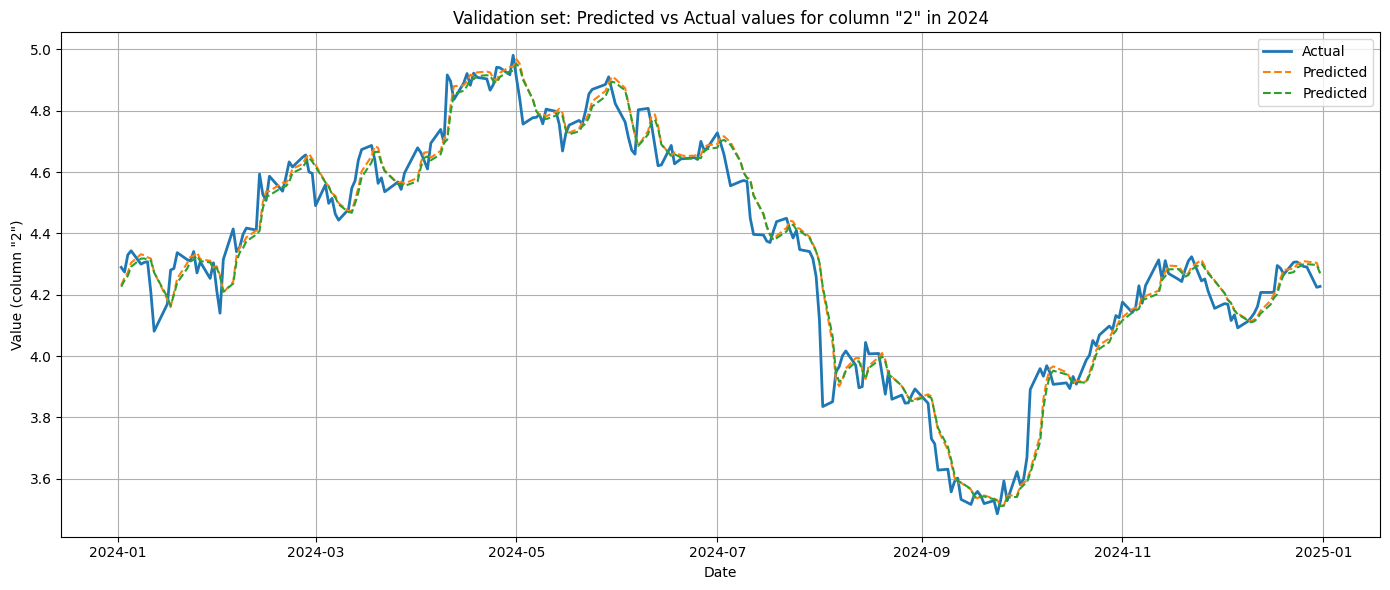

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Forudsig på validerings generatoren
val_preds = model.predict(val_gen)

sequence_length = val_gen.length
val_actual_raw = val_df["2"].reset_index(drop=True)[sequence_length:].values.reshape(-1, 1)
val_actual = val_actual_raw
val_preds_rescaled = scaler.inverse_transform(val_preds)

val_dates = val_df['Date'].reset_index(drop=True)[sequence_length:]

# Lav en mask, der vælger kun datoer i 2024
mask_2024 = (val_dates.dt.year == 2024)

# Filtrer data for 2024
val_dates_2024 = val_dates[mask_2024]
val_actual_2024 = val_actual[mask_2024]
val_preds_2024 = val_preds_rescaled[mask_2024]

plt.figure(figsize=(14, 6))
plt.plot(val_dates_2024, val_actual_2024, label='Actual', linewidth=2)
plt.plot(val_dates_2024, val_preds_2024, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value (column "2")')
plt.title('Validation set: Predicted vs Actual values for column "2" in 2024')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


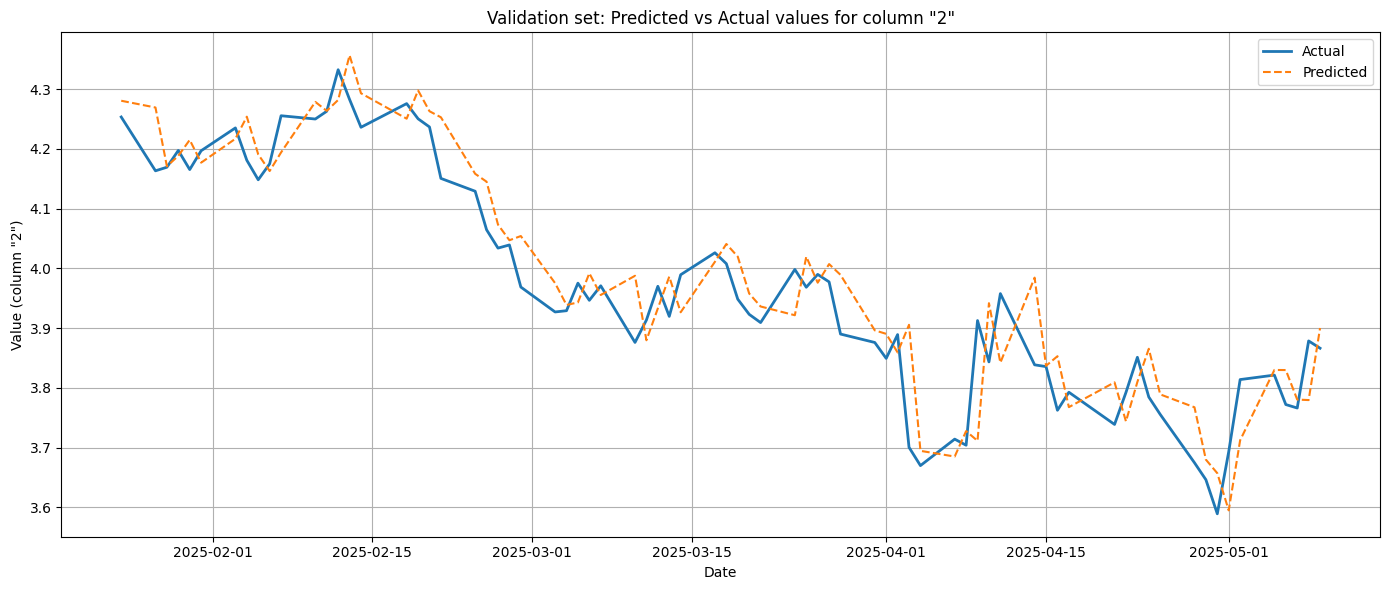

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Forudsig på validerings generatoren
test_preds = model.predict(test_gen)

# Slice target kolonne i val_df (fra sequence_length og frem)
sequence_length = test_gen.length
test_actual_raw = test_df["2"].reset_index(drop=True)[(sequence_length):].values.reshape(-1, 1)

# Inverse-transform direkte på slice
test_actual = test_actual_raw

test_preds_rescaled = scaler.inverse_transform(test_preds)

test_dates = test_df['Date'].reset_index(drop=True)[sequence_length:]

plt.figure(figsize=(14, 6))

plt.plot(test_dates, test_actual, label='Actual', linewidth=2)
plt.plot(test_dates, test_preds_rescaled, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value (column "2")')
plt.title('Validation set: Predicted vs Actual values for column "2"')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [27]:
# Sammenlign 10 første
print("Actual:", test_actual_rescaled[:10].values.flatten())
print("Predicted:", test_preds_rescaled[:10].flatten())


Actual: [4.2362 4.2758 4.2504 4.2367 4.1506 4.1291 4.0646 4.0339 4.0392 3.9687]
Predicted: [4.3277807 4.274315  4.304337  4.2886114 4.2717214 4.190096  4.158337
 4.098723  4.0634217 4.067149 ]


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
lookback = 5 
# Prepare input data
dates = data_1year['Date'].values
X = data_1year.drop(columns='Date').astype(np.float32).values
X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

# Create sequences for GRU
def create_sequences(X, lookback=lookback):
    X_seq, y_seq = [], []
    for i in range(len(X) - lookback):
        X_seq.append(X[i:i+lookback])
        y_seq.append(X[i+lookback])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, lookback=lookback)
date_y = dates[lookback:]  # Dates corresponding to each y_seq

# Define GRU model
model = Sequential([
    GRU(64, return_sequences=False, input_shape=(X_seq.shape[1], X_seq.shape[2])),
    Dense(32, activation='relu'),
    Dense(20)  # Predict 20 maturities
])

model.compile(optimizer=Adam(0.001), loss='mse')


/opt/anaconda3/envs/appml25/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from skopt import gp_minimize
from skopt.space import Real, Integer
from sklearn.model_selection import TimeSeriesSplit

# Define search space
search_space = [
    Integer(32, 256, name='units'),          # GRU units
    Integer(16, 256, name='dense_units'),    # Dense layer size
    Real(0.0, 0.5, name='dropout'),          # Dropout
    Real(1e-4, 1e-2, prior='log-uniform', name='learning_rate'),  # LR
    Integer(20, 100, name='epochs'),         # Epochs
    Integer(16, 128, name='batch_size')      # Batch size
]


def build_model(units, dense_units, dropout, learning_rate):
    model = Sequential([
        GRU(units, input_shape=(lookback, 20)),
        Dropout(dropout),
        Dense(dense_units, activation='relu'),
        Dense(20)
    ])
    model.compile(optimizer=Adam(learning_rate), loss='mse')
    return model


def objective(params):
    units, dense_units = int(params[0]), int(params[1])
    dropout, learning_rate = float(params[2]), float(params[3])
    epochs = int(params[4])
    batch_size = int(params[5])

    val_losses = []

    tscv = TimeSeriesSplit(n_splits=3)

    for train_idx, val_idx in tscv.split(X_seq):
        X_train, X_val = X_seq[train_idx], X_seq[val_idx]
        y_train, y_val = y_seq[train_idx], y_seq[val_idx]

        model = build_model(units, dense_units, dropout, learning_rate)
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)

        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stop],
            verbose=0
        )

        val_losses.append(min(history.history['val_loss']))

    return np.mean(val_losses)


# Run Bayesian optimization
result = gp_minimize(objective, search_space, n_calls=30, random_state=42)

print(f"Best parameters: {result.x}")
print(f"Best CV validation loss: {result.fun}")


/opt/anaconda3/envs/appml25/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/envs/appml25/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/envs/appml25/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/envs/appml25/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: U

Best parameters: [np.int64(38), np.int64(249), 0.4342281689778938, 0.00525152679998213, np.int64(35), np.int64(32)]
Best CV validation loss: 0.06410740688443184


# Anomaly detection

## Variational Auto-Encoder

### Fitting model

In [91]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
import numpy as np
import torch

seed = 42 
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


data_clean = data2.dropna().drop(columns=["Date"]).copy()
data_features = data_clean.drop(columns=['BETA0', 'BETA1', 'BETA2'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_features)
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)


input_dim = X_tensor.shape[1]
latent_dim = 2

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dims=[16,8], latent_dim=latent_dim):
        super(VAE, self).__init__()
        self.encoder_layers = nn.ModuleList()
        prev_dim = input_dim
        for h_dim in hidden_dims:
            self.encoder_layers.append(nn.Linear(prev_dim, h_dim))
            prev_dim = h_dim
        self.fc_mean = nn.Linear(prev_dim, latent_dim)
        self.fc_logvar = nn.Linear(prev_dim, latent_dim)

        self.decoder_layers = nn.ModuleList()
        hidden_dims.reverse()
        prev_dim = latent_dim
        for h_dim in hidden_dims:
            self.decoder_layers.append(nn.Linear(prev_dim, h_dim))
            prev_dim = h_dim
        self.output_layer = nn.Linear(prev_dim, input_dim)

        self.leaky_relu = nn.LeakyReLU(0.01)

    def encode(self, x):
        for layer in self.encoder_layers:
            x = self.leaky_relu(layer(x))
        return self.fc_mean(x), self.fc_logvar(x)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        for layer in self.decoder_layers:
            z = self.leaky_relu(layer(z))
        return self.output_layer(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_hat = self.decode(z)
        return x_hat, mu, logvar

def loss_fn(x, x_hat, mu, logvar, beta=1):
    recon_loss = nn.functional.l1_loss(x_hat, x, reduction='sum')
    kl = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + beta * kl

batch_size = 32
dataset = TensorDataset(X_tensor)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_vae = VAE(input_dim=input_dim, latent_dim=latent_dim).to(device)
optimizer = torch.optim.Adam(model_vae.parameters(), lr=1e-3)

epochs = 50
for epoch in range(epochs):
    model_vae.train()
    total_loss = 0
    for batch in loader:
        x = batch[0].to(device)
        optimizer.zero_grad()
        x_hat, mu, logvar = model_vae(x)
        loss = loss_fn(x, x_hat, mu, logvar)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(loader.dataset):.4f}")

model_vae.eval()
with torch.no_grad():
    X_reconstructed = model_vae(X_tensor.to(device))[0].cpu().numpy()

X_reconstructed_original = scaler.inverse_transform(X_reconstructed)
reconstructed_df = pd.DataFrame(X_reconstructed_original, columns=data_features.columns)


Epoch 1, Loss: 11.1907
Epoch 2, Loss: 6.4941
Epoch 3, Loss: 6.0987
Epoch 4, Loss: 5.8656
Epoch 5, Loss: 5.7497
Epoch 6, Loss: 5.6404
Epoch 7, Loss: 5.6478
Epoch 8, Loss: 5.5725
Epoch 9, Loss: 5.5523
Epoch 10, Loss: 5.4865
Epoch 11, Loss: 5.4226
Epoch 12, Loss: 5.4042
Epoch 13, Loss: 5.3457
Epoch 14, Loss: 5.3479
Epoch 15, Loss: 5.3084
Epoch 16, Loss: 5.2734
Epoch 17, Loss: 5.2314
Epoch 18, Loss: 5.2195
Epoch 19, Loss: 5.1937
Epoch 20, Loss: 5.1791
Epoch 21, Loss: 5.1856
Epoch 22, Loss: 5.1460
Epoch 23, Loss: 5.1402
Epoch 24, Loss: 5.1323
Epoch 25, Loss: 5.1368
Epoch 26, Loss: 5.1402
Epoch 27, Loss: 5.1057
Epoch 28, Loss: 5.0943
Epoch 29, Loss: 5.0874
Epoch 30, Loss: 5.0865
Epoch 31, Loss: 5.0733
Epoch 32, Loss: 5.0625
Epoch 33, Loss: 5.0489
Epoch 34, Loss: 5.0408
Epoch 35, Loss: 5.0489
Epoch 36, Loss: 5.0447
Epoch 37, Loss: 5.0223
Epoch 38, Loss: 5.0033
Epoch 39, Loss: 5.0200
Epoch 40, Loss: 5.0203
Epoch 41, Loss: 4.9927
Epoch 42, Loss: 5.0436
Epoch 43, Loss: 5.0271
Epoch 44, Loss: 5.0

In [100]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(scaler.inverse_transform(X_tensor.numpy()), X_reconstructed_original)
print(f"Reconstruction MSE: {mse:.4f}")

Reconstruction MSE: 0.3089


### Reconstructing 3d-plot

### Result of VAE

#### Latent space

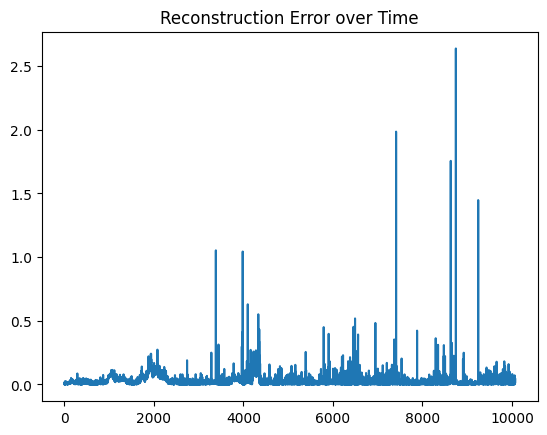

In [64]:
recon_error = np.mean((X_scaled - X_reconstructed)**2, axis=1)
plt.plot(recon_error)
plt.title("Reconstruction Error over Time")
plt.show()


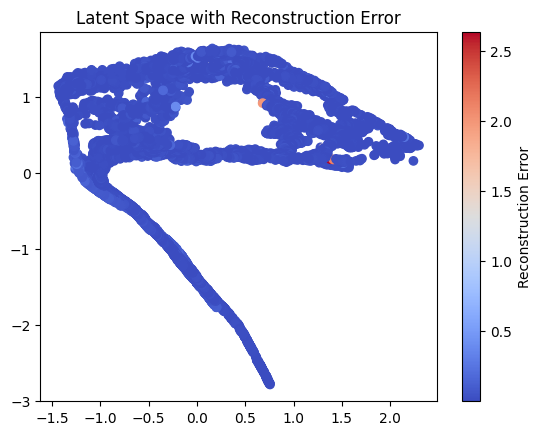

In [65]:
with torch.no_grad():
    mu, _ = model_vae.encode(X_tensor.to(device))
    mu = mu.cpu().numpy()

plt.scatter(mu[:, 0], mu[:, 1], c=recon_error, cmap='coolwarm')
plt.colorbar(label='Reconstruction Error')
plt.title('Latent Space with Reconstruction Error')
plt.show()


#### Anomaly detection

In [101]:

result_df = data2.loc[data_clean.index].copy()

print(result_df.columns)


Index(['Date', 'BETA0', 'BETA1', 'BETA2', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20'],
      dtype='object')


Anomalies detected: 101


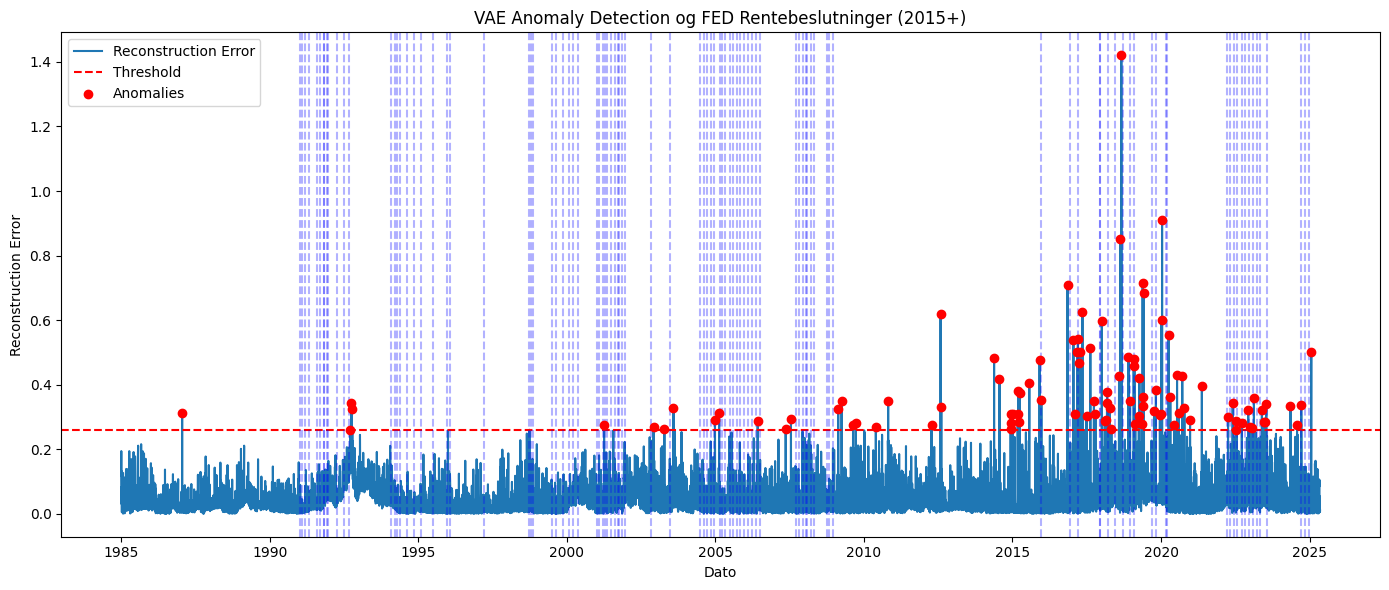

In [ ]:
import matplotlib.pyplot as plt

fed_df = pd.read_csv("FED_interest.csv", parse_dates=["Date"])

fed_df["Rate Change (bps)"] = pd.to_numeric(fed_df["Rate Change (bps)"], errors="coerce")

fed_change_dates = fed_df.loc[fed_df["Rate Change (bps)"] != 0, "Date"]

model_vae.eval()
with torch.no_grad():
    X_recon, _, _ = model_vae(X_tensor.to(device))
    reconstruction_error = torch.mean((X_tensor.to(device) - X_recon) ** 2, dim=1).cpu().numpy()

threshold = np.percentile(reconstruction_error, 99)
anomalies = reconstruction_error > threshold

result_df = pd.DataFrame({
    "Date": data2.loc[data2.dropna().index, "Date"],
    "reconstruction_error": reconstruction_error,
    "anomaly": anomalies
})

print("Anomalies detected:", np.sum(anomalies))



plt.figure(figsize=(14,6))
plt.plot(result_df["Date"], result_df["reconstruction_error"], label="Reconstruction Error")
plt.axhline(threshold, color='red', linestyle='--', label="Threshold")
plt.scatter(result_df.loc[result_df["anomaly"], "Date"],
            result_df.loc[result_df["anomaly"], "reconstruction_error"],
            color='red', label="Anomalies", zorder=5)

for date in fed_change_dates:
    plt.axvline(date, color='blue', linestyle='--', alpha=0.3)

plt.title("VAE Anomaly Detection og FED Rentebeslutninger (2015+)")
plt.xlabel("Dato")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.tight_layout()
plt.show()


In [103]:
anomaly_dates = result_df[result_df["anomaly"]]["Date"]
print(anomaly_dates)

anomaly_dates.shape

6680    1987-01-21
8157    1992-09-18
8163    1992-09-28
8168    1992-10-05
10385   2001-04-04
           ...    
16199   2023-07-18
16412   2024-05-10
16469   2024-07-30
16507   2024-09-20
16594   2025-01-21
Name: Date, Length: 101, dtype: datetime64[ns]


(101,)

In [104]:
import pandas as pd

# Dine datoer
fed_df = pd.read_csv("FED_interest.csv", parse_dates=["Date"])
fed_change_dates = fed_df[fed_df["Rate Change (bps)"] != '0']["Date"]

anomaly_dates = result_df[result_df["anomaly"]]["Date"]

# Lav set af datoer ±5 dage omkring hver renteændring
from datetime import timedelta

rente_vindue_dage = 3
all_change_windows = set()

for date in fed_change_dates:
    window = pd.date_range(date,
                           date + timedelta(days=rente_vindue_dage))
    all_change_windows.update(window)

# Find overlap med anomalier
anomalies_near_changes = anomaly_dates[anomaly_dates.isin(all_change_windows)]

print(f"Anomalier inden for (0, {rente_vindue_dage}) dage af en renteændring: {len(anomalies_near_changes)}")
print(anomalies_near_changes.sort_values().reset_index(drop=True))


Anomalier inden for (0, 3) dage af en renteændring: 3
0   2017-03-15
1   2019-10-30
2   2024-09-20
Name: Date, dtype: datetime64[ns]


93 dates overlapping out of 101 anomalies detected. 96 dates with rates changes in FED_interest.csv

In [105]:
non_overlap_dates = pd.Series(list(set(anomaly_dates) - set(fed_change_dates)))

print(f"Number of non-overlapping anomaly dates: {len(non_overlap_dates)}")
print("Non-overlapping anomaly dates:\n", non_overlap_dates.sort_values())


non_overlap_dates = pd.Series(list(set(fed_change_dates) - set(anomaly_dates)))

print(f"Number of non-overlapping anomaly dates: {len(non_overlap_dates)}")
print("Non-overlapping anomaly dates:\n", non_overlap_dates.sort_values())

Number of non-overlapping anomaly dates: 99
Non-overlapping anomaly dates:
 81   1987-01-21
93   1992-09-18
66   1992-09-28
26   1992-10-05
94   2001-04-04
        ...    
75   2023-07-18
64   2024-05-10
45   2024-07-30
80   2024-09-20
5    2025-01-21
Length: 99, dtype: datetime64[ns]
Number of non-overlapping anomaly dates: 98
Non-overlapping anomaly dates:
 38   1991-01-09
66   1991-02-01
43   1991-03-08
28   1991-04-30
61   1991-08-05
        ...    
50   2023-05-03
48   2023-07-26
44   2024-09-18
45   2024-11-07
40   2024-12-18
Length: 98, dtype: datetime64[ns]


In [ ]:
fed_df = pd.read_csv("FED_interest.csv", parse_dates=["Date"])
print(fed_df.shape)


fed_change_dates = fed_df[fed_df["Rate Change (bps)"] != '0']["Date"]


print(fed_change_dates.shape)


(12566, 5)
(12,)


In [ ]:
from datetime import timedelta

# Konverter til datetime hvis nødvendigt
anomaly_dates = pd.to_datetime(result_df[result_df["anomaly"]]["Date"])
fed_dates = pd.to_datetime(fed_change_dates)

# Lav en tom liste til at gemme overlap
close_anomalies = []

# Tæl hvor mange anomalier ligger tæt på en rentebeslutning
for fed_date in fed_dates:
    for delta in range(-3, 4):  # -3 til +3 dage
        nearby_date = fed_date + timedelta(days=delta)
        if nearby_date in anomaly_dates.values:
            close_anomalies.append(nearby_date)

# Fjern dubletter og sorter
unique_close_anomalies = pd.Series(list(set(close_anomalies))).sort_values()

print(f"Antal anomalier inden for ±3 dage af en FED-beslutning: {len(unique_close_anomalies)}")
print("Datoer for disse anomalier:\n", unique_close_anomalies)


Antal anomalier inden for ±3 dage af en FED-beslutning: 10
Datoer for disse anomalier:
 3   2000-02-01
9   2004-11-12
8   2017-03-13
6   2018-03-19
5   2022-12-15
0   2023-02-01
7   2023-02-02
2   2023-03-20
1   2023-05-02
4   2023-05-03
dtype: datetime64[ns]
